In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
missing = {"PRECIP" : "Nulo","EVAP" : "Nulo","TMAX" : "Nulo","TMIN" : "Nulo"}

df = pd.read_csv("aguascalientes.txt",sep = "\s+", na_values = missing)
df["FECHA"] = pd.to_datetime(df.FECHA)
df["TMED"] = (df["TMAX"]+df["TMIN"])/2
df["TDIF"] = df["TMAX"]-df["TMIN"]
df["MES"] = df["FECHA"].dt.month
df["AÑO"] = df["FECHA"].dt.year

df.describe()

,PRECIP,EVAP,TMAX,TMIN,TMED,TDIF,MES,AÑO
count,25627.000000,25363.000000,25619.000000,25616.000000,25613.000000,25613.000000,25627.000000,25627.000000
mean,1.452289,6.630990,26.343503,10.714643,18.528931,15.629579,6.529598,1982.331174
std,5.389103,2.622976,3.753796,4.605541,3.689287,4.020414,3.451362,20.260231
min,0.000000,0.000000,6.000000,-7.000000,1.000000,0.500000,1.000000,1947.000000
25%,0.000000,4.800000,24.000000,7.000000,15.750000,13.000000,4.000000,1965.000000
50%,0.000000,6.400000,26.500000,11.500000,19.000000,15.500000,7.000000,1982.000000
75%,0.000000,8.400000,29.000000,14.500000,21.250000,18.500000,10.000000,2000.000000
max,103.700000,17.600000,43.000000,21.000000,28.500000,34.000000,12.000000,2017.000000


In [49]:
""" Esta seccion puede ejecutarse para cualquier dataframe que este ordenado por año,
    el año menor en el primer dato y el año mayor en el ultimo dato
"""
#Obtiene el numero de dias con heladas por año
FD = []
años = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] < 0):
            ndias = ndias+1
    FD.append(ndias)
    años.append(i)
    ndias = 0

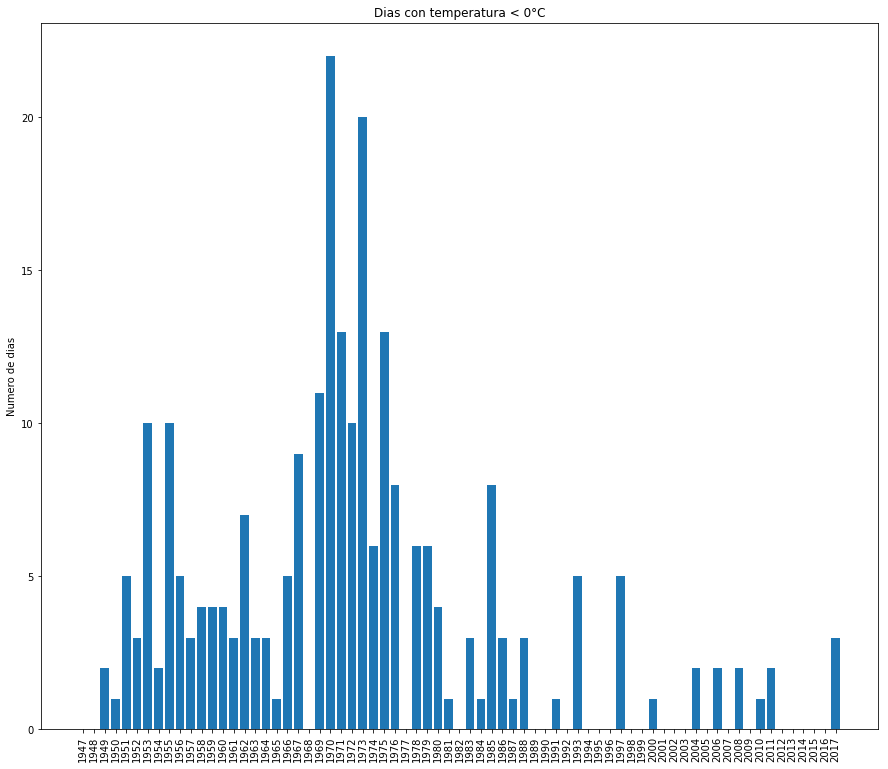

In [50]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),FD)
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [48]:
#Obtiene el numero de dias con heladas por año
SU = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMAX"][j] > 25):
            ndias = ndias+1
    SU.append(ndias)
    ndias = 0


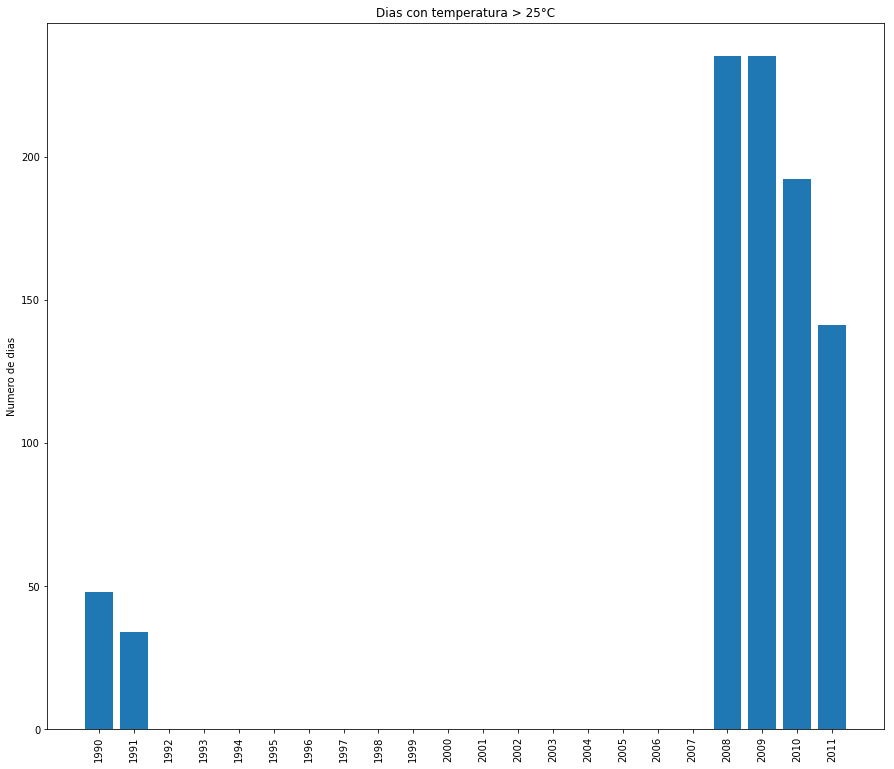

In [49]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),SU)
plt.title("Dias con temperatura > 25°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [50]:
#Obtiene el numero de dias tropicales por año
TR = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] > 20):
            ndias = ndias+1
    TR.append(ndias)
    ndias = 0

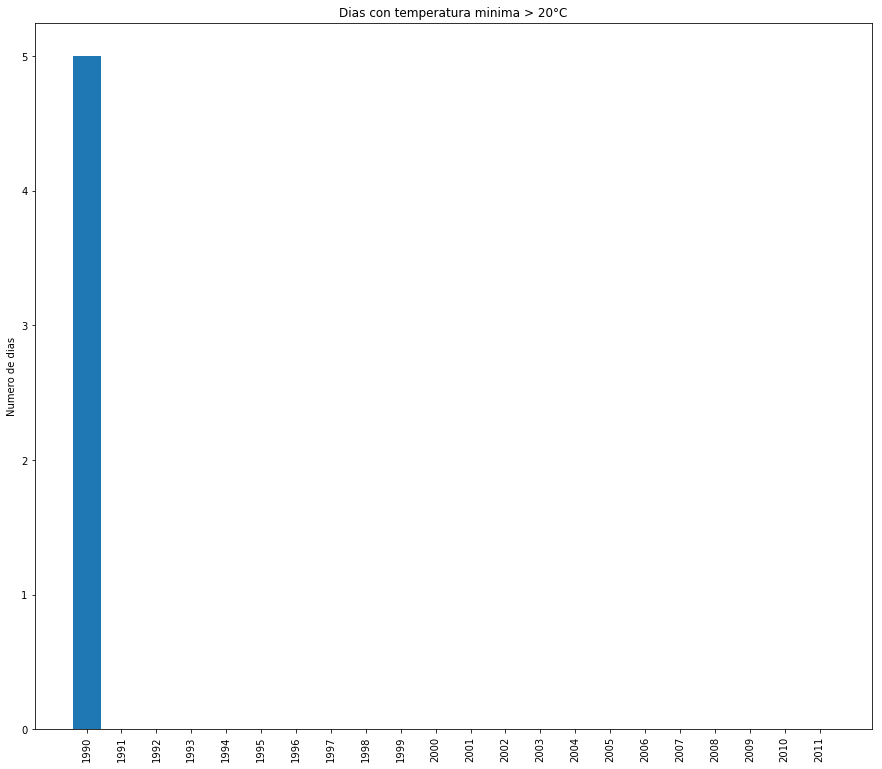

In [51]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),TR)
plt.title("Dias con temperatura minima > 20°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [53]:
#Recorre la lista muchas veces para encontrar los días por cada año.
#Basicamente recorre la lista en secciones de 5 y si toda esa seccion cumple con 
#la condicion guarda los indices en un array y deja de buscar para ese año (el break)
#luego lo mete en otro array para guardarlos y cambia al siguiente año
todosPrimeros = []
seisPrimeros = -1
for j in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    dfaño = df[df["AÑO"]==j]
    for i in dfaño.index:
            if(dfaño["TMED"][i]   > 5 and dfaño["TMED"][i+1] > 5 and dfaño["TMED"][i+2] > 5 and
               dfaño["TMED"][i+3] > 5 and dfaño["TMED"][i+4] > 5 and dfaño["TMED"][i+5] > 5):
                seisPrimeros = i
                break
    if(seisPrimeros != -1):
        todosPrimeros.append(seisPrimeros)
        seisPrimeros = -1
    else:
        todosPrimeros.append(None)

In [74]:
#Y este es para encontrar los seis ultimos, es lo mismo que lo anterior pero de abajo hacia arriba
todosUltimos = []
seisUltimos = -1
for j in range(df["AÑO"][len(df)-1],df["AÑO"][0]-1,-1):
    dfaño = df[df["AÑO"]==j]
    indix = dfaño.index
    indix = indix[::-1]
    for i in range(0,len(indix)-5):
        if(df["AÑO"][i] == j):
            if(dfaño["TMED"][indix[i]  ] < 5 and dfaño["TMED"][indix[i+1]] < 5 and dfaño["TMED"][indix[i+2]] < 5 and
               dfaño["TMED"][indix[i+3]] < 5 and dfaño["TMED"][indix[i+4]] < 5 and dfaño["TMED"][indix[i+5]] < 5):
                seisUltimos = i-5
                break
    if(seisUltimos != -1):
        todosUltimos.append(seisUltimos)
        seisUltimos= -1
    else:
        todosUltimos.append(None)
        
todosUltimos = todosUltimos[::-1]


In [59]:
GSL = []

for i in range(0,len(todosPrimeros)):
    if(todosUltimos[i]!= None and todosPrimeros[i] != None):
        GSL.append(todosUltimos[i]-todosPrimeros[i])
    else:
        GSL.append(365)

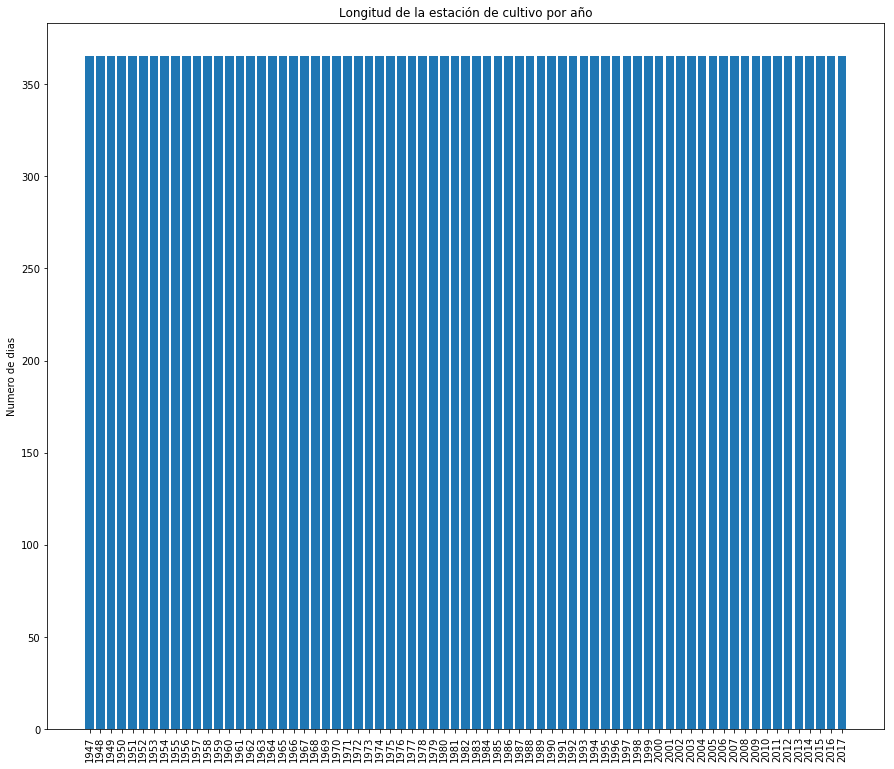

In [60]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),GSL)
plt.title("Longitud de la estación de cultivo por año")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [39]:
## Creo dos funciones que me encuentran el maximo y el minimo de una columna
## entre los años que el usuario quiera

def maxmensual(col,año1,año2):
    maximos = []
    maxi = -1000
    for n in range(año1,año2+1):
        dfaño = df[df["AÑO"]==n]
        for i in range(1,13):
            dfmes = dfaño[dfaño["MES"]==i]
            for j in dfmes.index:
                if(dfmes[col][j]>maxi):
                    maxi = dfmes[col][j]
            if(maxi != -1000):
                maximos.append(maxi)
                maxi = -1000
            else:
                maximos.append(None)
    return maximos

def minmensual(col,año1,año2):
    minimos = []
    mini = 1000
    for n in range(año1,año2+1):
        dfaño = df[df["AÑO"]==n]
        for i in range(1,13):
            dfmes = dfaño[dfaño["MES"]==i]
            for j in dfmes.index:
                if(dfmes[col][j]<mini):
                    mini = dfmes[col][j]
            if(mini != 1000):
                minimos.append(mini)
                mini = 1000
            else:
                minimos.append(None)
    return minimos

In [61]:
#Obtiene la maxima de temperatura maxima por mes de cada año.
TXx = maxmensual("TMAX",1990,df["AÑO"][len(df)-1])

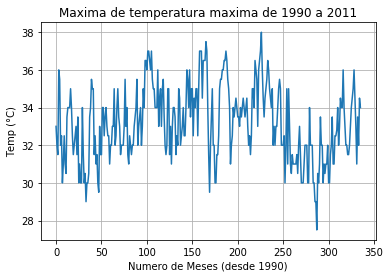

In [62]:
TXx = np.array(TXx).astype(np.double)
s1mask = np.isfinite(TXx)
plt.plot(np.arange(len(TXx))[s1mask],TXx[s1mask])
plt.title("Maxima de temperatura maxima de 1990 a 2011")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

In [63]:
#Obtiene la maxima de temperatura minima por mes de cada año.
TNx = maxmensual("TMIN",1990,df["AÑO"][len(df)-1])

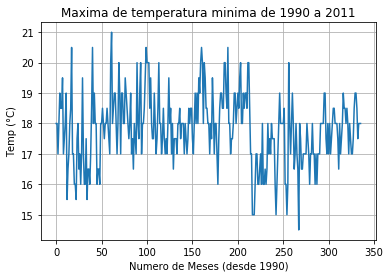

In [64]:
TNx = np.array(TNx).astype(np.double)
s1mask = np.isfinite(TNx)
plt.plot(np.arange(len(TNx))[s1mask],TNx[s1mask])
plt.title("Maxima de temperatura minima de 1990 a 2011")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

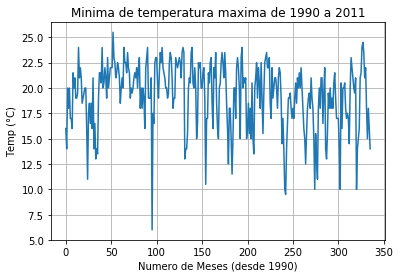

In [65]:
#Obtiene la minima de la temperatura maxima por mes de cada año
TXn = minmensual("TMAX",1990,df["AÑO"][len(df)-1])

TXn = np.array(TXn).astype(np.double)
s1mask = np.isfinite(TXn)
plt.plot(np.arange(len(TXn))[s1mask],TXn[s1mask])
plt.title("Minima de temperatura maxima de 1990 a 2011")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

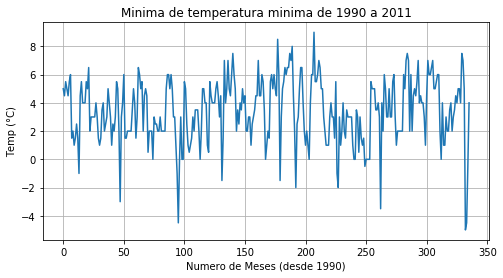

In [67]:
#Obtiene la minima de la temperatura maxima por mes de cada año
TNn = minmensual("TMIN",1990,df["AÑO"][len(df)-1])

plt.figure(figsize = (8, 4))
plt.plot(range(0,len(TNn)),TNn)
plt.title("Minima de temperatura minima de 1990 a 2011")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

In [68]:
DTR = []
k = 0
prom = 0
for n in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    daño = df[df["AÑO"]==n]
    for j in range(1,13):
        dmes = daño[daño["MES"]==j]
        for i in dmes.index:
            prom = prom + dmes["TDIF"][i]
            k = k+1
        if(k != 0):
            prom = prom/k
            DTR.append(prom)
            prom = 0
            k = 0
        else:
            DTR.append("NA")
        dmes = None

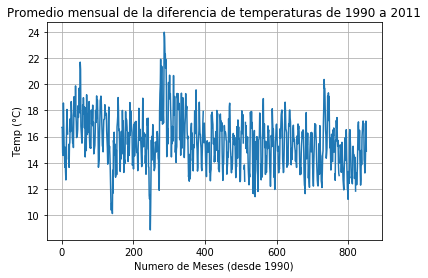

In [70]:
plt.plot(range(0,len(DTR)),DTR)
plt.title("Promedio mensual de la diferencia de temperaturas de 1990 a 2011")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

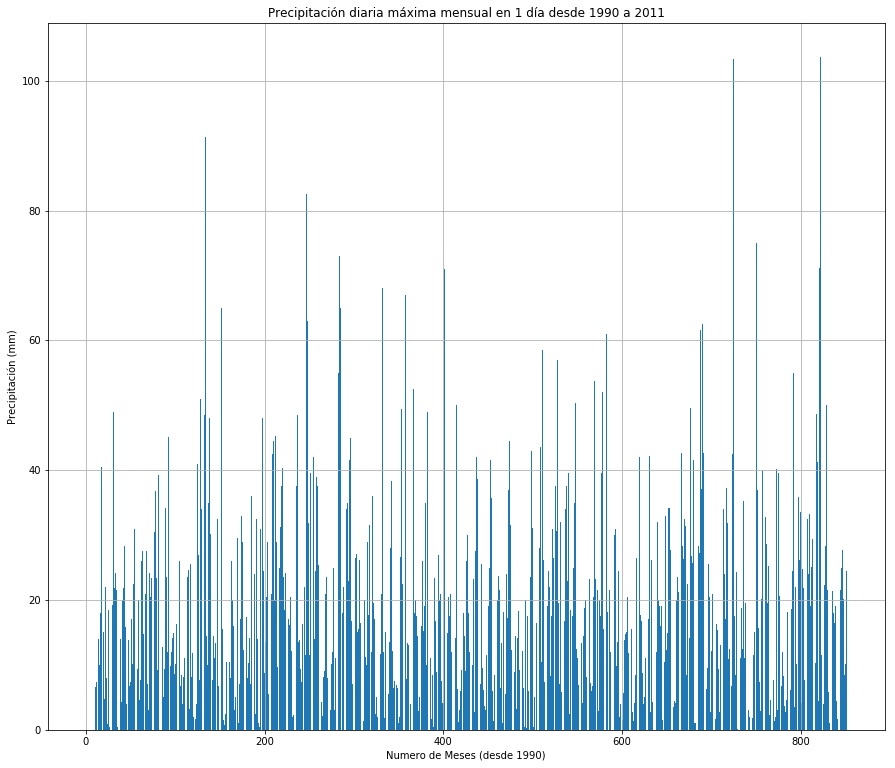

In [72]:
Rx1day = maxmensual("PRECIP",df["AÑO"][0],df["AÑO"][len(df)-1])

plt.figure(figsize = (15, 13))
plt.bar(np.arange(0,len(Rx1day)),Rx1day)
plt.title("Precipitación diaria máxima mensual en 1 día desde 1990 a 2011")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

In [76]:
Rx5day = []
maximas = -1000

for n in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    dfaño = df[df["AÑO"]==n]
    for j in range(1,13):
        dfmes = dfaño[dfaño["MES"] == j]
        indix = dfmes.index
        for i in range(0,len(indix)-4):
            temp = (dfmes["PRECIP"][indix[i+4]]+dfmes["PRECIP"][indix[i+3]]+
                    dfmes["PRECIP"][indix[i+2]]+dfmes["PRECIP"][indix[i+1]]+
                    dfmes["PRECIP"][indix[i]])
            if(maximas < temp):
                maximas = temp
        Rx5day.append(maximas)
        maximas = -1000

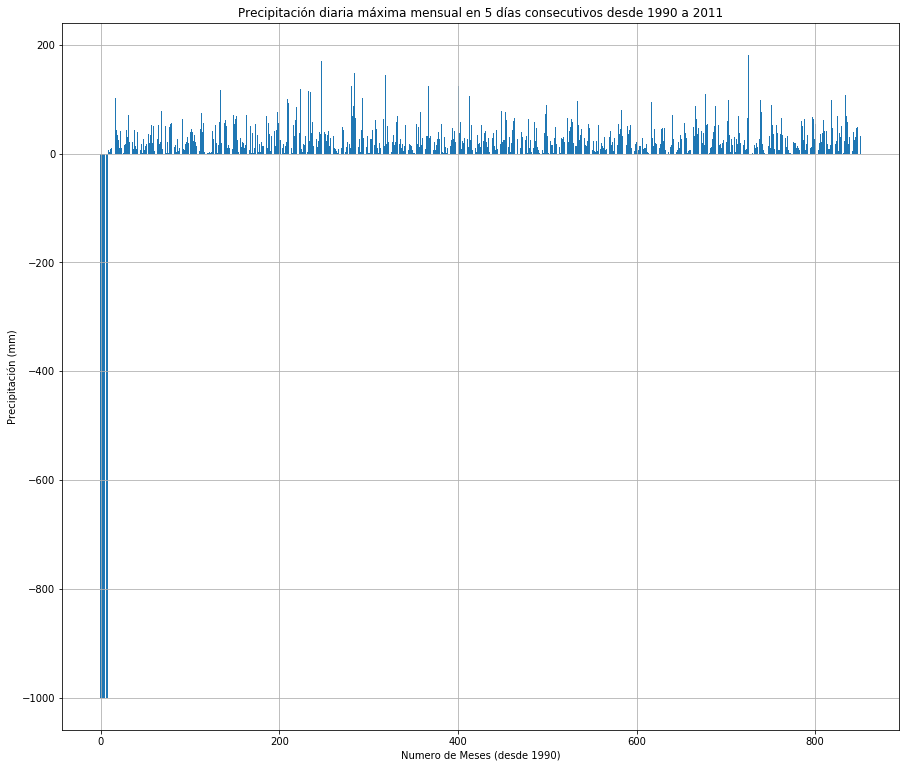

In [77]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(0,len(Rx5day)),Rx5day)
plt.title("Precipitación diaria máxima mensual en 5 días consecutivos desde 1990 a 2011")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.show()

In [23]:
#Obtiene el numero de dias con precipitacion mayor a 1mm por año
SDII = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 1):
            ndias = ndias+1
    SDII.append(ndias)
    ndias = 0

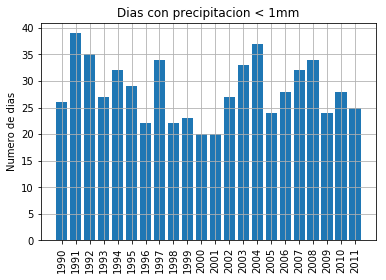

In [24]:
plt.bar(np.arange(len(años)),SDII)
plt.title("Dias con precipitacion < 1mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [25]:
#Obtiene el numero de dias con precipitacion mayor a 10mm por año
R10mm = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 10):
            ndias = ndias+1
    R10mm.append(ndias)
    ndias = 0

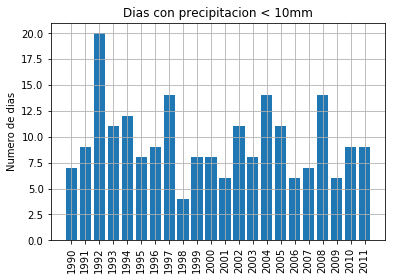

In [26]:
plt.grid()
plt.bar(np.arange(len(años)),R10mm)
plt.title("Dias con precipitacion < 10mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [27]:
#Obtiene el numero de dias con precipitacion mayor a 20mm por año
R20mm = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 20):
            ndias = ndias+1
    R20mm.append(ndias)
    ndias = 0

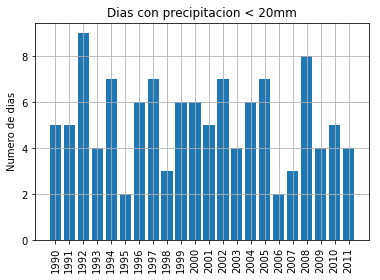

In [28]:
plt.bar(np.arange(len(años)),R20mm)
plt.title("Dias con precipitacion < 20mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [29]:
#Obtiene el número de días consecutivos secos por año. Los dias secps son dias sin precipitación o precipitación < 1mm.
CDD = []
ndias = 0
temp = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i):
            if(df["PRECIP"][j]<1):
                temp = temp+1
            elif(df["PRECIP"][j]>=1):
                if(temp > ndias):
                    ndias = temp
                    temp = 0
                else:
                    temp = 0
    CDD.append(ndias)
    ndias = 0
    temp = 0

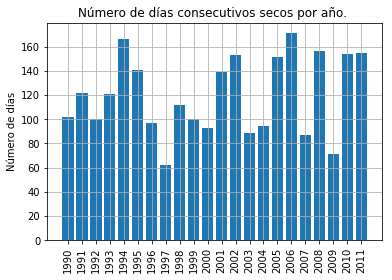

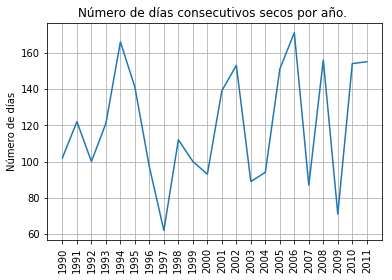

In [30]:
plt.bar(np.arange(len(años)),CDD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

plt.plot(np.arange(len(años)),CDD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [31]:
#Obtiene el número de días consecutivos humedos por año. Los dias secps son dias conn precipitación >= a 1mm.
CWD = []
ndias = 0
temp = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i):
            if(df["PRECIP"][j]>= 1):
                temp = temp+1
            elif(df["PRECIP"][j] < 1):
                if(temp > ndias):
                    ndias = temp
                    temp = 0
                else:
                    temp = 0
    CWD.append(ndias)
    ndias = 0
    temp = 0

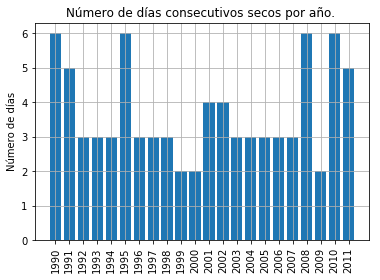

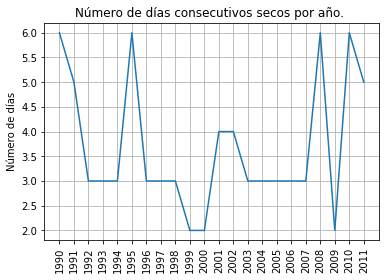

In [32]:
plt.bar(np.arange(len(años)),CWD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

plt.plot(np.arange(len(años)),CWD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()